In [219]:
#pip install voila
#pip install plotly
#pip install folium

# <span style = "font-family:Cambria; color:red">Analysis of Healthcare Facilities across the Globe</span>

<span style = "font-family:Georgia; color:teal">
<blockquote>Healthcare facilities have always been a topic of concern. Especially after the outbreak of Covid-19, the healthcare sector has been receiving undivided attention. Machine Learning has been highly reputed for uncovering hidden insights and for extracting obvious from the unobvious. The present work is primarily concerned with the study and analysis of the availability of basic healthcare facilities, viz. doctors, nurses and midwives, dentists, and pharmacists across different countries of the world.</blockquote>

In [220]:
%%html
<img src = "https://miro.medium.com/max/1247/1*IKOxmwm5U-bJ_CmkG7gaeQ.jpeg">

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.metrics import v_measure_score 
import plotly.figure_factory as ff

# **A look at the available datasets**

In [222]:
doctors_df = pd.read_csv("medicalDoctors.csv")

In [223]:
#from google.colab import files
#uploaded = files.upload()

In [224]:
#import io
#doctors_df=pd.read_csv(io.StringIO(uploaded['medicalDoctors.csv'].decode('utf-8')))

### Dataframe containing the data of Doctors (Top 5 rows)

In [225]:
fig =  ff.create_table(doctors_df.head(), height_constant=20, colorscale='purples_r')
fig.show()

In [226]:
#from google.colab import files
#uploaded = files.upload()

In [227]:
#import io
#nurses_df=pd.read_csv(io.StringIO(uploaded['nursingAndMidwife.csv'].decode('utf-8')))

In [228]:
nurses_df = pd.read_csv("nursingAndMidwife.csv")

### Dataframe containing the data of Nurses and Midwifery Personnel (Top 5 rows)

In [229]:
fig =  ff.create_table(nurses_df.head(), height_constant=20, colorscale='purd_r')
fig.layout.width=1200 #width in pixels
fig.show()

In [230]:
#from google.colab import files
#uploaded = files.upload()

In [231]:
#import io
#dentists_df=pd.read_csv(io.StringIO(uploaded['dentists.csv'].decode('utf-8')))

In [232]:
dentists_df = pd.read_csv("dentists.csv")

### Dataframe containing the data of Dentists (Top 5 rows)

In [233]:
fig =  ff.create_table(dentists_df.head(), height_constant=20, colorscale='greens_r')
fig.show()

In [234]:
#from google.colab import files
#uploaded = files.upload()

In [235]:
#import io
#pharmacists_df=pd.read_csv(io.StringIO(uploaded['pharmacists.csv'].decode('utf-8')))

### Dataframe containing the data of Pharmacists (Top 5 rows)

In [236]:
pharmacists_df = pd.read_csv("pharmacists.csv")

In [237]:
fig =  ff.create_table(pharmacists_df.head(), height_constant=20, colorscale='blues_r')
fig.show()

### Violin plots to visualize the distribution of data across several years

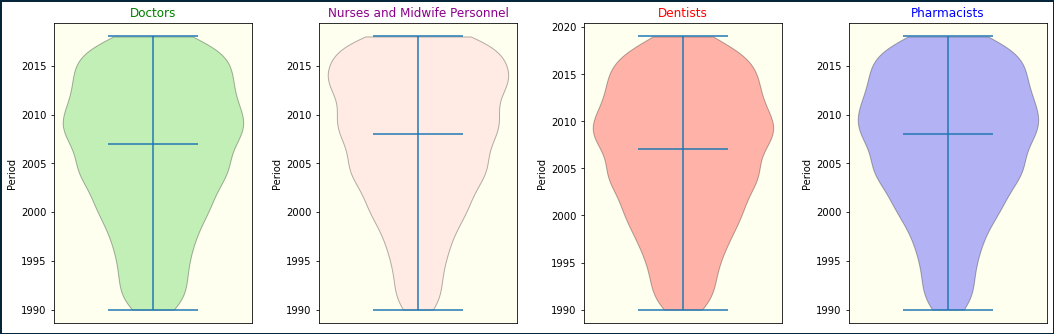

In [238]:
fig, ax = plt.subplots(1, 4, figsize=(15,5), linewidth=3, edgecolor="#04253a")
violin_parts = ax[0].violinplot(doctors_df['Period'], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('limegreen')
    pc.set_edgecolor('black')
ax[0].set_title('Doctors', color='green')
ax[0].set_xticks([1])
ax[0].set_xticks([])
ax[0].set_ylabel("Period")
ax[0].set_facecolor('Ivory')


violin_parts = ax[1].violinplot(nurses_df['Period'], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('pink')
    pc.set_edgecolor('black')
ax[1].set_ylabel("Period")
ax[1].set_xticks([])
ax[1].set_title('Nurses and Midwife Personnel', color='DarkMagenta')
ax[1].set_facecolor('Ivory')


violin_parts = ax[2].violinplot(dentists_df['Period'] ,showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
ax[2].set_title('Dentists', color='red')
ax[2].set_ylabel("Period")
ax[2].set_xticks([])
ax[2].set_facecolor('Ivory')

violin_parts = ax[3].violinplot(pharmacists_df['Period'], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
ax[3].set_title('Pharmacists', color='blue')
ax[3].set_ylabel("Period")
ax[3].set_xticks([])
ax[3].set_facecolor('Ivory')

fig.tight_layout(pad=2.0)

plt.show()

In [239]:
#doctors_df.shape

In [240]:
#doctors_df.describe()

In [241]:
doctors_df['Location'].replace({'Bolivia (Plurinational State of)':'Bolivia', 'Côte d’Ivoire':'Ivory Coast', 'Iran (Islamic Republic of)':'Iran', 'Micronesia (Federated States of':'Micronesia',
                       'Republic of Korea' :'South Korea', 'The former Yugoslav Republic of Macedonia' :'North Macedonia','Sudan (until 2011)':'Sudan','Venezuela (Bolivarian Republic of)':'Venezuela' },inplace=True)

In [242]:
#doctors_df.head()

### Number of records per country (Doctors)

In [243]:
country_records = (doctors_df['Location'].value_counts()).to_frame()   # Count the number of observations for each city
print(f'Total number of countries in the dataset : {len(country_records)}')  # Count the total number of cities in the dataframe
#country_records.head()

Total number of countries in the dataset : 193


In [244]:
country_records.reset_index(inplace=True)
country_records.rename(columns={"index": "Location", "Location": "Count"}, inplace=True)
#country_records.head()

In [245]:
import plotly.express as px

In [246]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
values = list(range(193))

fig = px.bar(country_records, x='Location', y='Count', title='<b><i>Number of Observations per Country</i></b>', color=values, color_continuous_scale=px.colors.cyclical.HSV, height=600, width=1000)
fig.update_layout(
    font_family="Georgia",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_size = 20,
    title_font_color="red",
)
fig.show()

In [247]:
index = doctors_df[['First Tooltip']].idxmax()

In [248]:
#index

In [249]:
loc_max = doctors_df.iloc[index]['Location'].values[0]

In [250]:
#type(loc_max)

In [251]:
#loc_max

In [252]:
year_max = doctors_df.iloc[index]['Period'].values[0]
#year_max

In [253]:
index = doctors_df[['First Tooltip']].idxmin()
#index

In [254]:
#doctors_df.iloc[index]

In [255]:
loc_min = doctors_df.iloc[index]['Location'].values[0]

In [256]:
#print(loc_min)

In [257]:
year_min = doctors_df.iloc[index]['Period'].values[0]
#year_min

In [258]:
from IPython.core.display import display, HTML

In [259]:
# displaying the total stats

display(HTML("<div style = 'background-color: #800080; padding: 25px '>" +
             "<span style='color: #fff; font-size:25px;'> Maximum number of Doctors (per 10,000 patients) : </span>"
             "<span style='color: #ffff1a; font-size:25px;'>" + (loc_max) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #ffff1a; font-size:25px;'>" + str(year_max) +"</span>" +"</br>"+
             "<span style='color: #fff; font-size:25px;'> Minimum number of Doctors (per 10,000 patients) : </span>" +
             "<span style='color: #ffff1a; font-size:25px;'>" + (loc_min) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #ffff1a; font-size:25px;'>"+ str(year_min) + "</span>"+
             "</div>")
       )

In [260]:
#doctors_df.head()

In [261]:
doctor = (doctors_df.groupby(['Location']).mean())
doctor.drop(columns='Period', inplace=True)

In [262]:
doctor.reset_index(level=0, inplace=True)

#doctor

## Choropleth map to visualize the number of doctors present in each country (per 10,000 people)

In [263]:
#!pip install folium

In [264]:
import folium

In [265]:
#country_geo = 'world-countries.json'
#country_geo

In [266]:
#pip install geopy

In [267]:
from geopy.geocoders import Nominatim

In [268]:
geolocator = Nominatim(user_agent="http")

In [269]:
def geolocate(country):
  try:
    loc= geolocator.geocode(country)
    return (loc.latitude, loc.longitude)
  except:
    return np.nan

In [270]:
country = set()
country = set(doctors_df['Location'])
#country

In [271]:
#len(country)

In [272]:
myDict = {key: None for key in country}
#print(myDict)

In [273]:
k = 0
for i in myDict.keys():
  myDict[i]=geolocate(i)
  k+=1
#print(myDict)

In [274]:
doctors_df['Location_xy'] = doctors_df['Location'].map(myDict)
#doctor['Latitude'], doctor['Longitude'] = zip(*doctor.Location_xy)
doctors_df[['Latitude', 'Longitude']] = pd.DataFrame(doctors_df['Location_xy'].tolist(), index=doctors_df.index)

#doctors_df.head()

In [275]:
doctors_df.drop(columns='Location_xy', inplace=True)

In [276]:
#doctors_df.head()

In [277]:
import requests

In [278]:
URL = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json"
world_geo = requests.get(url = URL).json()

In [279]:
#world_geo

In [280]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(doctor['First Tooltip'].min(),
                              doctor['First Tooltip'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


In [281]:
world_choropleth = folium.Map(location=[0, 0], tiles = 'stamenterrain', zoom_start = 2)

tiles = ['stamentoner', 'stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(world_choropleth)

#  add Locations to map
cp = folium.Choropleth(
    geo_data=world_geo,
    data=doctor,
    columns=['Location','First Tooltip'],
    key_on='feature.properties.name',
    fill_color='Set1',  #'RdPu',
    threshold_scale=threshold_scale,
    fill_opacity=1, 
    line_opacity=0.8,
    highlight = True,
    nan_fill_color = "White",
    legend_name='Average number of Doctors (per 10,000)').add_to(world_choropleth)

#add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(world_choropleth)

# display map
world_choropleth

In [282]:
## **Nurses**

In [283]:
nurses_df['Location'].replace({'Bolivia (Plurinational State of)':'Bolivia', 'Côte d’Ivoire':'Ivory Coast', 'Iran (Islamic Republic of)':'Iran', 'Micronesia (Federated States of':'Micronesia',
                       'Republic of Korea' :'South Korea', 'The former Yugoslav Republic of Macedonia' :'North Macedonia','Sudan (until 2011)':'Sudan','Venezuela (Bolivarian Republic of)':'Venezuela' },inplace=True)

In [284]:
#nurses_df.head()

In [285]:
#nurses_df.shape

In [286]:
#nurses_df.describe()

### Number of records per country (Nurses and Midwifery Personnel)

In [287]:
nurses_df = nurses_df[nurses_df['Location']!='Belize']

In [288]:
country_records = (nurses_df['Location'].value_counts()).to_frame()   # Count the number of observations for each city
print(f'Total number of countries in the dataset : {len(country_records)}')  # Count the total number of cities in the dataframe
#country_records

Total number of countries in the dataset : 192


In [289]:
country_records.reset_index(inplace=True)
country_records.rename(columns={"index": "Location", "Location": "Count"}, inplace=True)
#country_records

In [290]:
#import plotly.express as px

In [291]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
values = list(range(192))

fig = px.bar(country_records, x='Location', y='Count', title='<b><i>Number of Records per Country (Nurses and Midwifery Personnel)</i></b>',color=values, color_continuous_scale=px.colors.sequential.Rainbow, height=600, width=1000)
fig.update_layout(
    font_family="Georgia",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    legend_title_font_color="green"
)
fig.show()


In [292]:
min_index = nurses_df[['First Tooltip']].idxmin()
#print(min_index)

In [293]:
loc_min = nurses_df.iloc[min_index]['Location'].values[0]
#print(loc_min)
year_min = nurses_df.iloc[min_index]['Period'].values[0]
#print(year_min)

In [294]:
max_index = nurses_df[['First Tooltip']].idxmax()
#print(min_index)

In [295]:
loc_max = nurses_df.iloc[max_index]['Location'].values[0]
#print(loc_max)
year_max = nurses_df.iloc[max_index]['Period'].values[0]
#print(year_max)

In [296]:
# displaying the total stats

display(HTML("<div style = 'background-color: #ff66cc; padding: 25px '>" +
             "<span style='color: #fff; font-size:20px;'> Maximum number of Nurses (per 10,000 patients) : </span>"
             "<span style='color: #000066; font-size:20px;'>" + (loc_max) + "</span>" +
             "<span style='color: #fff; font-size:20px;'> in the year : </span>" +
             "<span style='color: #000066; font-size:20px;'>" + str(year_max) +"</span>" +"</br>"+
             "<span style='color: #fff; font-size:20px;'> Minimum number of Nurses (per 10,000 patients) : </span>" +
             "<span style='color: #000066; font-size:20px;'>" + (loc_min) + "</span>" +
             "<span style='color: #fff; font-size:20px;'> in the year : </span>" +
             "<span style='color: #000066; font-size:20px;'>"+ str(year_min) + "</span>"+
             "</div>")
       )

In [297]:
#nurses_df.describe()

In [298]:
#nurses_df[nurses_df['First Tooltip']>500]

In [299]:
nurse = (nurses_df.groupby(['Location']).mean())
nurse.drop(columns='Period', inplace=True)

In [300]:
nurse.reset_index(level=0, inplace=True)
#nurse

In [301]:
nurses_df['Location_xy'] = nurses_df['Location'].map(myDict)

In [302]:
nurses_df[['Latitude', 'Longitude']] = pd.DataFrame(nurses_df['Location_xy'].tolist(), index=nurses_df.index)
#nurses_df.head()

In [303]:
nurses_df.drop(columns='Location_xy', inplace=True)
#nurses_df.head()

In [304]:
nurses_df.dropna(inplace=True)

In [305]:
#nurse.describe()

In [306]:
#nurses_df.head()

In [307]:
#nurse = nurse[nurse['First Tooltip']<100]
#nurse.describe()

In [308]:
#n = nurse[nurse['First Tooltip']<70]
#n.describe()

## Choropleth map to visualize the number of nurses and midwifery personnel present in each country (per 10,000 people)

In [309]:
#create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(nurse['First Tooltip'].min(),
                              nurse['First Tooltip'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


In [310]:
#threshold_scale

In [311]:
world_choropleth = folium.Map(location=[0, 0], tiles = 'stamenterrain', zoom_start = 2)

tiles = ['stamentoner', 'stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(world_choropleth)

#  add Locations to map
cp = folium.Choropleth(
    geo_data=world_geo,
    data=nurse,
    columns=['Location','First Tooltip'],
    key_on='feature.properties.name',
    fill_color='Spectral',  #'RdPu',
    threshold_scale=threshold_scale,
    fill_opacity=1, 
    line_opacity=0.8,
    highlight = True,
    nan_fill_color = "White",
    legend_name='Average number of Doctors (per 10,000)').add_to(world_choropleth)

#add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(world_choropleth)

# display map
world_choropleth

In [312]:
dentists_df['Location'].replace({'Bolivia (Plurinational State of)':'Bolivia', 'Côte d’Ivoire':'Ivory Coast', 'Iran (Islamic Republic of)':'Iran', 'Micronesia (Federated States of':'Micronesia',
                       'Republic of Korea' :'South Korea', 'The former Yugoslav Republic of Macedonia' :'North Macedonia','Sudan (until 2011)':'Sudan','Venezuela (Bolivarian Republic of)':'Venezuela' },inplace=True)

In [313]:
#dentists_df.head()

In [314]:
#dentists_df.shape

In [315]:
#dentists_df.describe()

### Number of Dentists per Country (per 10,000 people)

In [316]:
country_records = (dentists_df['Location'].value_counts()).to_frame()   # Count the number of observations for each city
print(f'Total number of countries in the dataset : {len(country_records)}')  # Count the total number of cities in the dataframe
#country_records

Total number of countries in the dataset : 190


In [317]:
country_records.reset_index(inplace=True)
country_records.rename(columns={"index": "Location", "Location": "Count"}, inplace=True)
#country_records.head()

In [318]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
values = list(range(190))

fig = px.bar(country_records, x='Location', y='Count',color=values, title="<b><i>Number of Records per Country</i></b>", color_continuous_scale=px.colors.sequential.Jet, height=600, width=1000)
fig.update_layout(
    font_family="Georgia",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    legend_title_font_color="green"
)
fig.show()


In [319]:
min_index = dentists_df[['First Tooltip']].idxmin()
#print(min_index)

In [320]:
loc_min = dentists_df.iloc[min_index]['Location'].values[0]
#print(loc_min)
year_min = dentists_df.iloc[min_index]['Period'].values[0]
#print(year_min)

In [321]:
max_index = dentists_df[['First Tooltip']].idxmax()
#print(max_index)

In [322]:
loc_max = dentists_df.iloc[max_index]['Location'].values[0]
#print(loc_max)
year_max = dentists_df.iloc[max_index]['Period'].values[0]
#print(year_max)

In [323]:
# displaying the total stats

display(HTML("<div style = 'background-color: #bf4080; padding: 25px '>" +
             "<span style='color: #fff; font-size:25px;'> Maximum number of Dentists (per 10,000 patients) : </span>"
             "<span style='color: #ccffff; font-size:25px;'>" + (loc_max) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #ccffff; font-size:25px;'>" + str(year_max) +"</span>" +"</br>"+
             "<span style='color: #fff; font-size:25px;'> Minimum number of Dentists (per 10,000 patients) : </span>" +
             "<span style='color: #ccffff; font-size:25px;'>" + (loc_min) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #ccffff; font-size:25px;'>"+ str(year_min) + "</span>"+
             "</div>")
       )

In [324]:
dentists_df['Location_xy'] = dentists_df['Location'].map(myDict)
#dentists['Latitude'], dentists['Longitude'] = zip(*dentists.Location_xy)
dentists_df[['Latitude', 'Longitude']] = pd.DataFrame(dentists_df['Location_xy'].tolist(), index=dentists_df.index)

#dentists_df.head()

In [325]:
dentists_df.drop(columns=['Location_xy'], inplace=True)
#dentists_df.head()

In [326]:
dentists = (dentists_df.groupby(['Location']).mean())
dentists.drop(columns='Period', inplace=True)
dentists.reset_index(inplace=True)
#dentists.head()

In [327]:
#dentists.describe()

In [328]:
## Choropleth map to visualize the number of Dentists present in each country (per 10,000 people)

In [329]:
world_choropleth = folium.Map(location=[0, 0], tiles = 'stamenterrain', zoom_start = 2)

tiles = ['stamentoner', 'stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(world_choropleth)

#  add Locations to map
cp = folium.Choropleth(
    geo_data=world_geo,
    data=dentists,
    columns=['Location','First Tooltip'],
    key_on='feature.properties.name',
    fill_color='PRGn',
    fill_opacity=1, 
    line_opacity=0.8,
    highlight = True,
    nan_fill_color = "White",
    legend_name='Average number of Dentists (per 10,000)').add_to(world_choropleth)

#add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(world_choropleth)

# display map
world_choropleth

In [330]:
pharmacists_df['Location'].replace({'Bolivia (Plurinational State of)':'Bolivia', 'Côte d’Ivoire':'Ivory Coast', 'Iran (Islamic Republic of)':'Iran', 'Micronesia (Federated States of':'Micronesia',
                       'Republic of Korea' :'South Korea', 'The former Yugoslav Republic of Macedonia' :'North Macedonia','Sudan (until 2011)':'Sudan','Venezuela (Bolivarian Republic of)':'Venezuela' },inplace=True)

In [331]:
#pharmacists_df.head()

In [332]:
#pharmacists_df.shape

In [333]:
#pharmacists_df.describe()

### Number of Pharmacists per country (Per 10,000 people)

In [334]:
country_records = (pharmacists_df['Location'].value_counts()).to_frame()   # Count the number of observations for each city
print(f'Total number of countries in the dataset : {len(country_records)}')  # Count the total number of cities in the dataframe
#country_records

Total number of countries in the dataset : 184


In [335]:
country_records.reset_index(inplace=True)
country_records.rename(columns={"index": "Location", "Location": "Count"}, inplace=True)
#country_records.head()

In [336]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
values = list(range(184))

fig = px.bar(country_records, x='Location', y='Count', title="<b><i>Number of Records per Country</i></b>", color=values, color_continuous_scale=px.colors.sequential.Pinkyl, height=600, width=1000)
fig.update_layout(
    font_family="Georgia",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    legend_title_font_color="green"
)
fig.show()


In [337]:
min_index = pharmacists_df[['First Tooltip']].idxmin()
#print(min_index)

In [338]:
loc_min = pharmacists_df.iloc[min_index]['Location'].values[0]
#print(loc_min)
year_min = pharmacists_df.iloc[min_index]['Period'].values[0]
#print(year_min)

In [339]:
max_index = pharmacists_df[['First Tooltip']].idxmax()
#print(max_index)

In [340]:
loc_max = pharmacists_df.iloc[max_index]['Location'].values[0]
#print(loc_max)
year_max = pharmacists_df.iloc[max_index]['Period'].values[0]
#print(year_max)

In [341]:
# displaying the total stats

display(HTML("<div style = 'background-color: #0000ff; padding: 25px '>" +
             "<span style='color: #fff; font-size:25px;'> Maximum number of Pharmacists (per 10,000 patients) : </span>"
             "<span style='color: #e6e6e6; font-size:25px;'>" + (loc_max) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #e6e6e6; font-size:25px;'>" + str(year_max) +"</span>" +"</br>"+
             "<span style='color: #fff; font-size:25px;'> Minimum number of Pharmacists (per 10,000 patients) : </span>" +
             "<span style='color: #e6e6e6; font-size:25px;'>" + (loc_min) + "</span>" +
             "<span style='color: #fff; font-size:25px;'> in the year : </span>" +
             "<span style='color: #e6e6e6; font-size:25px;'>"+ str(year_min) + "</span>"+
             "</div>")
       )

In [342]:
pharmacists_df['Location_xy'] = pharmacists_df['Location'].map(myDict)

In [343]:
pharmacists_df[['Latitude', 'Longitude']] = pd.DataFrame(pharmacists_df['Location_xy'].tolist(), index=pharmacists_df.index)

In [344]:
pharmacists_df.drop(columns='Location_xy', inplace=True)
#pharmacists_df.head()

In [345]:
pharmacists_df.dropna(inplace=True)
#pharmacists_df.head()

In [346]:
pharmacists = (pharmacists_df.groupby(['Location']).mean())
pharmacists.drop(columns='Period', inplace=True)
pharmacists.reset_index(inplace=True)

In [347]:
#pharmacists.head()

In [348]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(pharmacists['First Tooltip'].min(),
                              pharmacists['First Tooltip'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


In [349]:
x = pharmacists[pharmacists['First Tooltip']>17]

In [350]:
#x

### Choropleth map to visualize the number of pharmacists present in each country (Per 10,000 people)

In [351]:
world_choropleth = folium.Map(location=[0, 0], tiles = 'stamenterrain', zoom_start = 2)

tiles = ['stamentoner', 'stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(world_choropleth)

#  add Locations to map
cp = folium.Choropleth(
    geo_data=world_geo,
    data=pharmacists,
    columns=['Location','First Tooltip'],
    key_on='feature.properties.name',
    fill_color='Paired',
    fill_opacity=1, 
    line_opacity=0.8,
    threshold_scale=threshold_scale,
    highlight = True,
    nan_fill_color = "White",
    legend_name='Average number of Pharmacists (per 10,000)').add_to(world_choropleth)

#add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl('topleft').add_to(world_choropleth)

# display map
world_choropleth

## Clustering the data using K-means Clustering

### 1. For Doctors

In [352]:
doctor_cluster = doctors_df[doctors_df['Period']>=2015].groupby(['Location']).max()
doctor_cluster.reset_index(inplace=True)

In [353]:
#doctor_cluster.head()

In [354]:
doctor_x = doctor_cluster[['First Tooltip']]
#doctor_x.head()

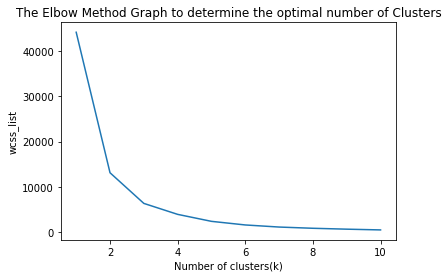

In [355]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(doctor_x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph to determine the optimal number of Clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [356]:
from sklearn.cluster import KMeans 

In [357]:
# set number of clusters
kclusters = 3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(doctor_x)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

In [358]:
doctor_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [359]:
#doctor_cluster[doctor_cluster['Cluster Labels']==0]

In [360]:
#doctor_cluster[doctor_cluster['Cluster Labels']==1]

In [361]:
#doctor_cluster[doctor_cluster['Cluster Labels']==2]

In [362]:
# create a list of our conditions
conditions = [
    (doctor_cluster['Cluster Labels'] == 0),
    (doctor_cluster['Cluster Labels'] == 1),
    (doctor_cluster['Cluster Labels'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = ['⭐', '⭐⭐', '⭐⭐⭐']

# create a new column and use np.select to assign values to it using our lists as arguments
doctor_cluster['Availability'] = np.select(conditions, values)

In [363]:
#doctor_cluster.head()

In [364]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

### A look at the clusters present worldwide

In [365]:
doctor_cluster.dropna(inplace=True)

In [366]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avail, val in zip(doctor_cluster['Latitude'], doctor_cluster['Longitude'], doctor_cluster['Location'], doctor_cluster['Cluster Labels'], doctor_cluster['Availability'], doctor_cluster['First Tooltip']):
    label = folium.Popup(str(poi) + ' Availability ' + str(avail) + ' First Tooltip ' + str(val), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 2. Nurses and Midwifery Personnel

In [367]:
nurse_cluster = nurses_df[nurses_df['Period']>=2015].groupby(['Location']).max()
nurse_cluster.reset_index(inplace=True)

In [368]:
#nurse_cluster.head()

In [369]:
nurse_x = nurse_cluster[['First Tooltip']]
#nurse_x.head()

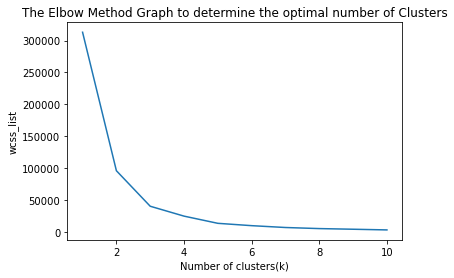

In [370]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(nurse_x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph to determine the optimal number of Clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [371]:
# set number of clusters
kclusters = 3
#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nurse_x)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

In [372]:
nurse_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [373]:
#nurse_cluster[nurse_cluster['Cluster Labels']==0]

In [374]:
#nurse_cluster[nurse_cluster['Cluster Labels']==1]

In [375]:
#nurse_cluster[nurse_cluster['Cluster Labels']==2]

In [376]:
# create a list of our conditions
conditions = [
    (nurse_cluster['Cluster Labels'] == 0),
    (nurse_cluster['Cluster Labels'] == 1),
    (nurse_cluster['Cluster Labels'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = ['⭐', '⭐⭐⭐', '⭐⭐']

# create a new column and use np.select to assign values to it using our lists as arguments
nurse_cluster['Availability'] = np.select(conditions, values)

In [377]:
#nurse_cluster.head()

### Corresponding map showing the Clusters

In [378]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avail, tt in zip(nurse_cluster['Latitude'], nurse_cluster['Longitude'], nurse_cluster['Location'], nurse_cluster['Cluster Labels'], nurse_cluster['Availability'], nurse_cluster['First Tooltip']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(avail) + ' Tooltip ' + str(tt), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 3. Dentists

In [379]:
dentist_cluster = dentists_df[dentists_df['Period']>=2015].groupby(['Location']).max()
dentist_cluster.reset_index(inplace=True)

In [380]:
#dentist_cluster.head()

In [381]:
dentist_x = dentist_cluster[['First Tooltip']]
#dentist_x.head()

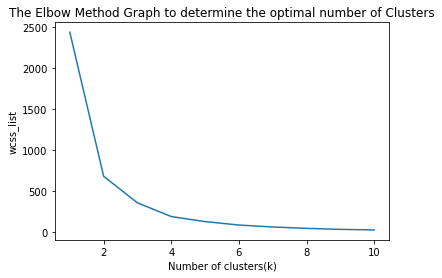

In [382]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(dentist_x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph to determine the optimal number of Clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [383]:
# set number of clusters
kclusters = 3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dentist_x)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

In [384]:
dentist_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [385]:
dentist_cluster.dropna(inplace=True)

In [386]:
#dentist_cluster

In [387]:
#dentist_cluster[dentist_cluster['Cluster Labels']==0]

In [388]:
#dentist_cluster[dentist_cluster['Cluster Labels']==1]

In [389]:
#dentist_cluster[dentist_cluster['Cluster Labels']==2]

In [390]:
# create a list of our conditions
conditions = [
    (dentist_cluster['Cluster Labels'] == 0),
    (dentist_cluster['Cluster Labels'] == 1),
    (dentist_cluster['Cluster Labels'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = ['⭐', '⭐⭐', '⭐⭐⭐']

# create a new column and use np.select to assign values to it using our lists as arguments
dentist_cluster['Availability'] = np.select(conditions, values)

### Map to visualize the clusters formed

In [391]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avail, tt in zip(dentist_cluster['Latitude'], dentist_cluster['Longitude'], dentist_cluster['Location'], dentist_cluster['Cluster Labels'], dentist_cluster['Availability'], dentist_cluster['First Tooltip']):
    label = folium.Popup(str(poi) + ' Availability ' + str(avail) + ' Tooltip ' + str(tt), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Pharmacists

In [392]:
pharmacist_cluster = pharmacists_df[pharmacists_df['Period']>=2015].groupby(['Location']).max()
pharmacist_cluster.reset_index(inplace=True)

In [393]:
pharmacist_x = pharmacist_cluster[['First Tooltip']]

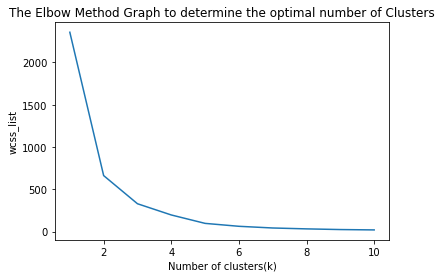

In [394]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(pharmacist_x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph to determine the optimal number of Clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [395]:
# set number of clusters
kclusters = 3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pharmacist_x)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

In [396]:
pharmacist_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [397]:
#pharmacist_cluster[pharmacist_cluster['Cluster Labels']==0]

In [398]:
#pharmacist_cluster[pharmacist_cluster['Cluster Labels']==1]

In [399]:
#pharmacist_cluster[pharmacist_cluster['Cluster Labels']==2]

In [400]:
# create a list of our conditions
conditions = [
    (pharmacist_cluster['Cluster Labels'] == 0),
    (pharmacist_cluster['Cluster Labels'] == 1),
    (pharmacist_cluster['Cluster Labels'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = ['⭐⭐','⭐', '⭐⭐⭐']

# create a new column and use np.select to assign values to it using our lists as arguments
pharmacist_cluster['Availability'] = np.select(conditions, values)

### An overview of the Clusters formed

In [401]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avail, tt in zip(pharmacist_cluster['Latitude'], pharmacist_cluster['Longitude'], pharmacist_cluster['Location'], pharmacist_cluster['Cluster Labels'], pharmacist_cluster['Availability'], pharmacist_cluster['First Tooltip']):
    label = folium.Popup(str(poi) + ' Availability ' + str(avail) + ' Tooltip ' + str(tt), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [402]:
#doctor_cluster.head()

### Swarmplots to visualize the Clusters formed for each dataset

#### Doctors

<AxesSubplot:xlabel='Cluster Labels', ylabel='First Tooltip'>

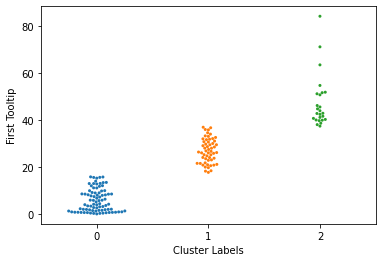

In [403]:
sns.swarmplot(x = doctor_cluster['Cluster Labels'], y = doctor_cluster['First Tooltip'], s=3)

#### Nurses and Midwifery Personnel

<AxesSubplot:xlabel='Cluster Labels', ylabel='First Tooltip'>

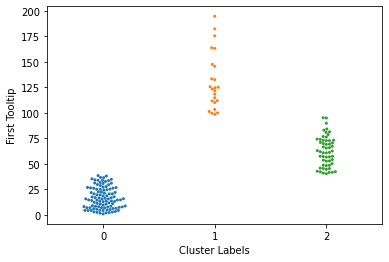

In [404]:
sns.swarmplot(x = nurse_cluster['Cluster Labels'], y = nurse_cluster['First Tooltip'], s=3)

#### Dentists

<AxesSubplot:xlabel='Cluster Labels', ylabel='First Tooltip'>

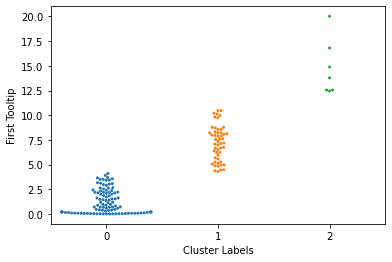

In [405]:
sns.swarmplot(x = dentist_cluster['Cluster Labels'], y = dentist_cluster['First Tooltip'], s=3)

#### Pharmacists

<AxesSubplot:xlabel='Cluster Labels', ylabel='First Tooltip'>

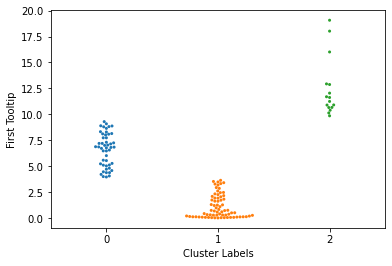

In [406]:
sns.swarmplot(x = pharmacist_cluster['Cluster Labels'], y = pharmacist_cluster['First Tooltip'], s=3)

In [407]:
doctor_cluster.rename(columns={'First Tooltip':'First Tooltip Doctor'}, inplace=True)
#doctor_cluster.head()

In [408]:
nurse_cluster.rename(columns={'First Tooltip':'First Tooltip Nurse'}, inplace=True)
#nurse_cluster.head()

In [409]:
dentist_cluster.rename(columns={'First Tooltip':'First Tooltip Dentist'}, inplace=True)
#dentist_cluster.head()

In [410]:
pharmacist_cluster.rename(columns={'First Tooltip':'First Tooltip Pharmacist'}, inplace=True)
#pharmacist_cluster.head()

In [411]:
df_merged = pd.merge(pd.merge(pd.merge(doctor_cluster,nurse_cluster,on='Location'), dentist_cluster, on="Location"), pharmacist_cluster, on="Location")
#df_merged.head()

In [412]:
#df_merged.shape

In [413]:
df_merged = df_merged[['Location', 'First Tooltip Doctor', 'First Tooltip Nurse', 'First Tooltip Dentist', 'First Tooltip Pharmacist']]

In [414]:
df_merged['Location_xy'] = df_merged['Location'].map(myDict)
df_merged['Latitude'], df_merged['Longitude'] = zip(*df_merged.Location_xy)
#df_merged.head()

In [415]:
df_merged = df_merged[['Location', 'Latitude', 'Longitude', 'First Tooltip Doctor', 'First Tooltip Nurse', 'First Tooltip Dentist', 'First Tooltip Pharmacist']]

In [416]:
#df_merged.head()

In [417]:
#df_merged.rename(columns={'Latitude_x':'Latitude', 'Longitude_x':'Longitude'}, inplace=True)
#df_merged.head()

In [418]:
#df_merged

In [419]:
health_x = df_merged[['First Tooltip Doctor', 'First Tooltip Nurse', 'First Tooltip Dentist', 'First Tooltip Pharmacist']]
#health_x.head()

### Clustering of the overall healthcare facilities (Amalgamation of the four datasets used above)

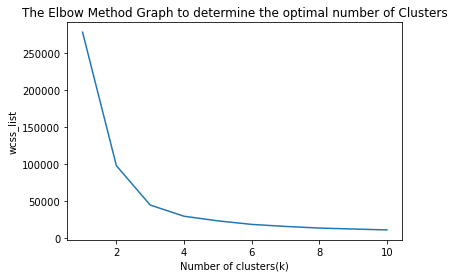

In [420]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(health_x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph to determine the optimal number of Clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [421]:
# set number of clusters
kclusters = 3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(health_x)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]

In [422]:
df_merged.insert(0, 'Cluster Labels', kmeans.labels_)
#df_merged.head()

In [423]:
#df_merged[df_merged['Cluster Labels']==2]

In [424]:
# Function to change the marker color 
# according to the elevation of volcano
def color(clust):
    if clust == 0:
        col = 'beige'
    elif clust == 1:
        col = 'purple'
    elif clust == 2:
        col = 'blue'
    return col

### The visual treat- Map equipped with Clusters

In [425]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, ttd, ttn, ttde, ttp in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Location'], df_merged['Cluster Labels'],
                                                       df_merged['First Tooltip Doctor'], df_merged['First Tooltip Nurse'], df_merged['First Tooltip Dentist'],
                                                       df_merged['First Tooltip Pharmacist']):
    label = '{} Cluster {} First Tooltip Doctor: {} First Tooltip Nurse: {} First Tooltip Dentist: {} First Tooltip Pharmacist: {}'.format(poi,cluster, ttd, ttn, ttde, ttp)  # Modify the label
    folium.Marker(
        [lat, lon],
        popup=label,
        icon= folium.Icon(color=color(cluster))).add_to(map_clusters)
map_clusters

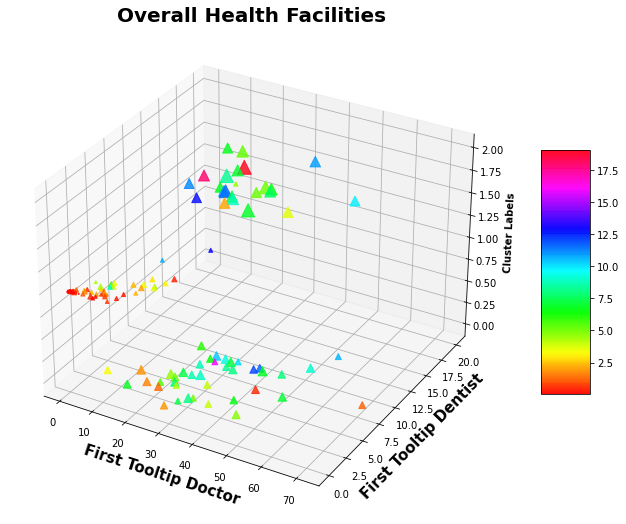

In [426]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = df_merged['Cluster Labels']
x = df_merged['First Tooltip Doctor']
y = df_merged['First Tooltip Dentist']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.1)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = df_merged['First Tooltip Pharmacist'],
                    s = df_merged['First Tooltip Nurse'],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Overall Health Facilities", fontweight='bold', fontsize=20)
ax.set_xlabel('First Tooltip Doctor', fontweight ='bold', fontsize=15)
ax.set_ylabel('First Tooltip Dentist', fontweight ='bold', fontsize=15)
ax.set_zlabel('Cluster Labels', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

## A glance at the healthcare facilities of major countries across several years

In [427]:
doctors_df.rename(columns = {'First Tooltip' : 'First Tooltip Doctors'}, inplace=True)
nurses_df.rename(columns = {'First Tooltip': 'First Tooltip Nurses'}, inplace=True)
dentists_df.rename(columns = {'First Tooltip': 'First Tooltip Dentists'}, inplace=True)
pharmacists_df.rename(columns = {'First Tooltip': 'First Tooltip Pharmacists'}, inplace=True)

In [428]:
df_merged_total = pd.merge(pd.merge(pd.merge(doctors_df,nurses_df,on=['Location','Period']), dentists_df, on=["Location","Period"]), pharmacists_df, on=["Location", "Period"])
#df_merged_total.head()

In [429]:
#df_merged_total['Location'].unique()

In [430]:
df_merged_total = df_merged_total[['Location', 'Period', 'Latitude_x', 'Longitude_x', 'First Tooltip Doctors', 'First Tooltip Nurses', 'First Tooltip Dentists', 'First Tooltip Pharmacists']]

In [431]:
df_merged_total.rename(columns={'Latitude_x':'Latitude', 'Longitude_x':'Longitude'}, inplace=True)
#df_merged_total.head()

In [432]:
#df_merged_total = df_merged_total[df_merged_total['Period']>=2010]

In [433]:
place = ['India', 'China', 'Afghanistan', 'Australia', 'Italy']

start_date1 = 1991
end_date1 = 2018

mask1 = (df_merged_total['Period'] >= start_date1) & (df_merged_total['Period']  <= end_date1)
health_filtered = df_merged_total.loc[mask1]
health_filtered.fillna(method='bfill',inplace=True)
health_filtered.set_index('Period',inplace=True)

df1 = health_filtered[['Location', 'First Tooltip Doctors','First Tooltip Nurses','First Tooltip Dentists','First Tooltip Pharmacists']]
#df1.head()

In [434]:
import plotly.graph_objects as go

In [435]:
def pollution_comparison(location):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['Location']==location]['First Tooltip Doctors'],
                    line=dict(dash='solid',color='green'),name='Doctor'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['Location']==location]['First Tooltip Nurses'],
                    line=dict(dash='dot',color='red'),name='Nurses'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['Location']==location]['First Tooltip Dentists'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Dentists'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['Location']==location]['First Tooltip Pharmacists'],
                    line=dict(dash='longdashdot'),mode='lines',name='Pharmacists'))
    fig.update_layout(title_text=location ,plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

In [436]:
for i in place:
  pollution_comparison(i) #'Afghanistan')

# <span style = "font-family:Mistral; font-size:50px; color:purple">Thank You!</span>
## <span style = "font-family:Calibri; color:red">Brought to you by Apurva, Sushma and Ahsan.</span>